## Carga de datos

### Imports de librerias y configuracion de visualizacion

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from db_connection import query_to_df

In [17]:
# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

print("=" * 60)
print("ANÁLISIS EXPLORATORIO DE DATOS - NATALIDAD CHILE")
print("=" * 60)

ANÁLISIS EXPLORATORIO DE DATOS - NATALIDAD CHILE


### Extraccion de datos desde POSTGRESQL

In [18]:
# Consulta para obtener información general de la tabla
query_info = """
SELECT COUNT(*) as total_registros,
       MIN(ano_nac) as ano_minimo,
       MAX(ano_nac) as ano_maximo,
       COUNT(DISTINCT glosa_region_residencia) as total_regiones
FROM nacimiento;
"""

info_general = query_to_df(query_info)
print("\n📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)
print(info_general)


/home/atay/Visualization/db_connection.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)



📊 INFORMACIÓN GENERAL DEL DATASET
   total_registros  ano_minimo  ano_maximo  total_regiones
0          5075255        2001        2022              17


### Cargar muestra representativa

In [19]:
# Extraer muestra estratificada por año (10,000 registros por año más reciente)
query_muestra = """
SELECT *
FROM nacimiento
WHERE ano_nac >= 2001
ORDER BY RANDOM()
LIMIT 500000;
"""

df = query_to_df(query_muestra)

print("\n📋 MUESTRA DE DATOS CARGADA")
print("=" * 60)
print(f"Registros en muestra: {len(df):,}")
print(f"Columnas: {len(df.columns)}")
print(f"\nPrimeras filas:")
display(df.head())


/home/atay/Visualization/db_connection.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)



📋 MUESTRA DE DATOS CARGADA
Registros en muestra: 500,000
Columnas: 25

Primeras filas:


,mes_nac,ano_nac,sexo,tipo_parto,tipo_aten,parto_local,semanas,rango_peso,talla,grupo_etario_padre,curso_padre,nivel_padre,activ_padre,ocupa_padre,categ_padre,grupo_etario_madre,est_civ_madre,curso_madre,nivel_madre,activ_madre,ocupa_madre,categ_madre,nacionalidad_madre,region_residencia,glosa_region_residencia
0,9,2011,1,1,1,1,39.0,3000 - 3999,51.0,35 A 39 AÑOS,1.0,2.0,1.0,8,2,30 A 34 AÑOS,1,8,4.0,0.0,2,0,C,13,Metropolitana de Santiago
1,10,2003,2,1,2,1,40.0,3000 - 3999,49.0,35 A 39 AÑOS,2.0,2.0,1.0,7,3,25 A 29 AÑOS,2,2,2.0,0.0,2,0,C,10,De Los Lagos
2,12,2003,2,1,1,1,39.0,3000 - 3999,50.0,25 A 29 AÑOS,3.0,2.0,1.0,8,2,20 A 24 AÑOS,1,4,2.0,0.0,2,0,C,13,Metropolitana de Santiago
3,12,2022,2,1,1,1,38.0,3000 - 3999,48.0,25 A 29 AÑOS,4.0,2.0,1.0,X,2,15 A 19 AÑOS,1,4,2.0,1.0,X,4,E,13,Metropolitana de Santiago
4,9,2022,1,1,1,1,39.0,3000 - 3999,50.0,20 A 24 AÑOS,2.0,2.0,1.0,9,3,15 A 19 AÑOS,1,2,2.0,0.0,3,0,C,13,Metropolitana de Santiago


## Analisis general(estructura,nulos,distribuciones)

### Analisis de estructura y calidad

In [20]:
print("\n🔍 ANÁLISIS DE ESTRUCTURA")
print("=" * 60)
print(df.info())

print("\n📈 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)
display(df.describe())

print("\n❌ VALORES NULOS POR COLUMNA")
print("=" * 60)
nulos = df.isnull().sum()
nulos_pct = (nulos / len(df) * 100).round(2)
df_nulos = pd.DataFrame({
    'Columna': nulos.index,
    'Valores Nulos': nulos.values,
    'Porcentaje': nulos_pct.values
})
df_nulos = df_nulos[df_nulos['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)
display(df_nulos)



🔍 ANÁLISIS DE ESTRUCTURA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   mes_nac                  500000 non-null  int64  
 1   ano_nac                  500000 non-null  int64  
 2   sexo                     500000 non-null  int64  
 3   tipo_parto               500000 non-null  int64  
 4   tipo_aten                500000 non-null  int64  
 5   parto_local              500000 non-null  int64  
 6   semanas                  499274 non-null  float64
 7   rango_peso               500000 non-null  object 
 8   talla                    499165 non-null  float64
 9   grupo_etario_padre       500000 non-null  object 
 10  curso_padre              500000 non-null  float64
 11  nivel_padre              449413 non-null  float64
 12  activ_padre              455267 non-null  float64
 13  ocupa_padre              500000 n

,mes_nac,ano_nac,sexo,tipo_parto,tipo_aten,parto_local,semanas,talla,curso_padre,nivel_padre,activ_padre,categ_padre,est_civ_madre,curso_madre,nivel_madre,activ_madre,categ_madre,region_residencia
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499274.000000,499165.000000,500000.000000,449413.000000,455267.000000,500000.000000,500000.000000,500000.000000,499983.000000,499999.000000,500000.000000,500000.000000
mean,6.490392,2011.123494,1.490814,1.031932,1.577984,1.025914,38.469173,49.239302,4.616272,1.940556,0.885267,3.230768,1.340494,4.044728,1.969675,0.516189,1.063902,9.581858
std,3.461410,6.180059,0.503043,0.333300,0.560948,0.313858,1.884800,2.603660,2.191858,0.935564,0.375478,2.321696,0.505789,1.713320,0.965978,1.083708,1.510220,3.992887
min,1.000000,2001.000000,1.000000,1.000000,1.000000,1.000000,16.000000,17.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3.000000,2006.000000,1.000000,1.000000,1.000000,1.000000,38.000000,48.000000,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.000000,6.000000
50%,7.000000,2011.000000,1.000000,1.000000,2.000000,1.000000,39.000000,50.000000,4.000000,2.000000,1.000000,2.000000,1.000000,4.000000,2.000000,0.000000,0.000000,10.000000
75%,9.000000,2016.000000,2.000000,1.000000,2.000000,1.000000,40.000000,51.000000,5.000000,2.000000,1.000000,3.000000,2.000000,5.000000,2.000000,1.000000,2.000000,13.000000
max,12.000000,2022.000000,9.000000,9.000000,9.000000,9.000000,43.000000,59.000000,9.000000,5.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,16.000000



❌ VALORES NULOS POR COLUMNA


,Columna,Valores Nulos,Porcentaje
11,nivel_padre,50587,10.12
12,activ_padre,44733,8.95
22,nacionalidad_madre,11028,2.21
8,talla,835,0.17
6,semanas,726,0.15
20,ocupa_madre,292,0.06
18,nivel_madre,17,0.00
19,activ_madre,1,0.00


## Variables clave(Anio,sexo,region,tipo parto)

### 4.Analisis de variables clave


📊 DISTRIBUCIÓN POR AÑO
ano_nac
2001    24319
2002    23594
2003    23182
2004    22818
2005    22970
2006    22635
2007    23892
2008    24205
2009    25138
2010    24694
2011    24283
2012    23824
2013    23574
2014    24561
2015    24016
2016    22623
2017    21556
2018    22013
2019    20803
2020    18858
2021    17656
2022    18786
Name: count, dtype: int64


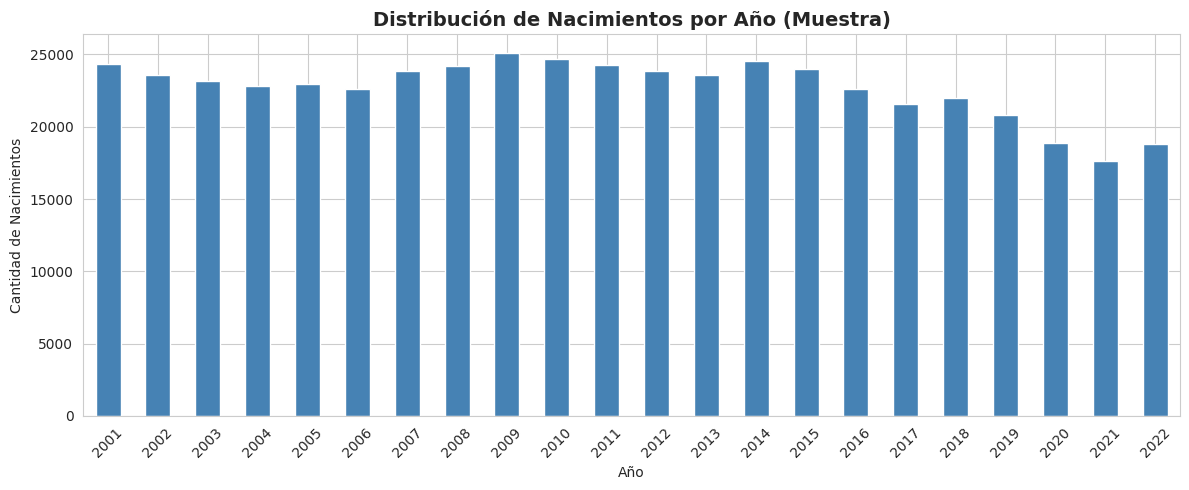


👶 DISTRIBUCIÓN POR SEXO
sexo_desc
Femenino         254789
Masculino        245183
Indeterminado        28
Name: count, dtype: int64


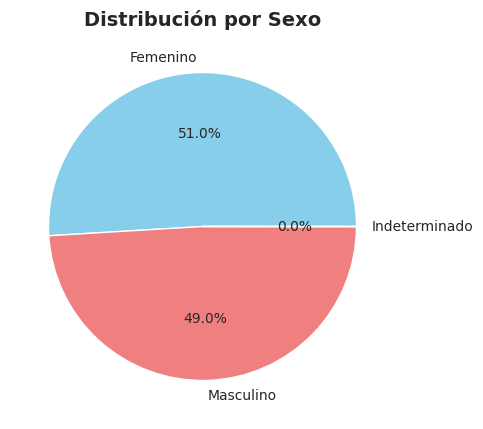


🏥 DISTRIBUCIÓN POR TIPO DE PARTO
parto_desc
Espontáneo        489238
Cesárea             9808
Ignorado             706
Fórceps/Vacuum       234
Name: count, dtype: int64


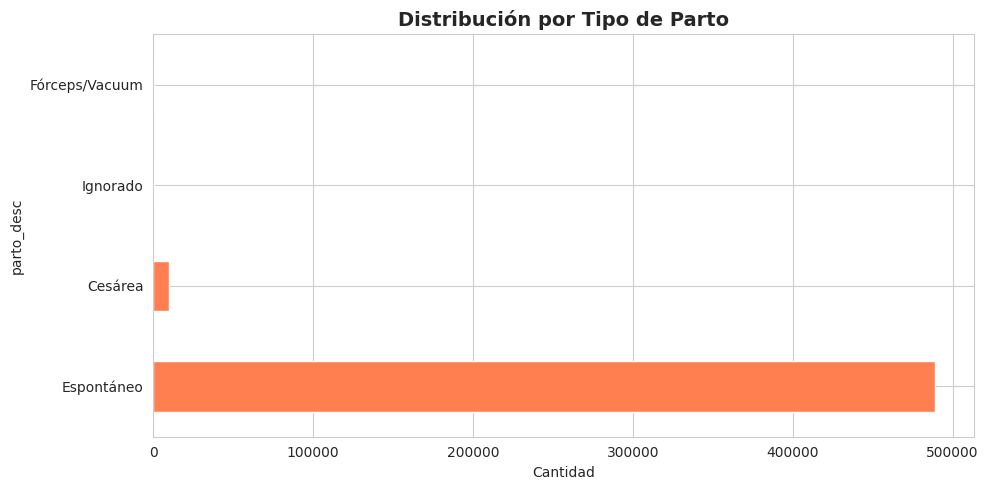

In [21]:
print("\n📊 DISTRIBUCIÓN POR AÑO")
print("=" * 60)
dist_ano = df['ano_nac'].value_counts().sort_index()
print(dist_ano)

plt.figure(figsize=(12, 5))
dist_ano.plot(kind='bar', color='steelblue')
plt.title('Distribución de Nacimientos por Año (Muestra)', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Cantidad de Nacimientos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n👶 DISTRIBUCIÓN POR SEXO")
print("=" * 60)
sexo_map = {1: 'Femenino', 2: 'Masculino', 9: 'Indeterminado'}
df['sexo_desc'] = df['sexo'].map(sexo_map)
print(df['sexo_desc'].value_counts())

plt.figure(figsize=(8, 5))
df['sexo_desc'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgray'])
plt.title('Distribución por Sexo', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

print("\n🏥 DISTRIBUCIÓN POR TIPO DE PARTO")
print("=" * 60)
parto_map = {1: 'Espontáneo', 2: 'Cesárea', 3: 'Fórceps/Vacuum', 9: 'Ignorado'}
df['parto_desc'] = df['tipo_parto'].map(parto_map)
print(df['parto_desc'].value_counts())

plt.figure(figsize=(10, 5))
df['parto_desc'].value_counts().plot(kind='barh', color='coral')
plt.title('Distribución por Tipo de Parto', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad')
plt.tight_layout()
plt.show()



🗺️ DISTRIBUCIÓN POR REGIÓN
glosa_region_residencia
Metropolitana de Santiago      205333
De Valparaíso                   47520
Del Bíobío                      43649
Del Maule                       28631
De La Araucanía                 27397
Del Libertador B. O'Higgins     25231
De Los Lagos                    24095
De Coquimbo                     21328
De Antofagasta                  19342
De Ñuble                        12204
Name: count, dtype: int64


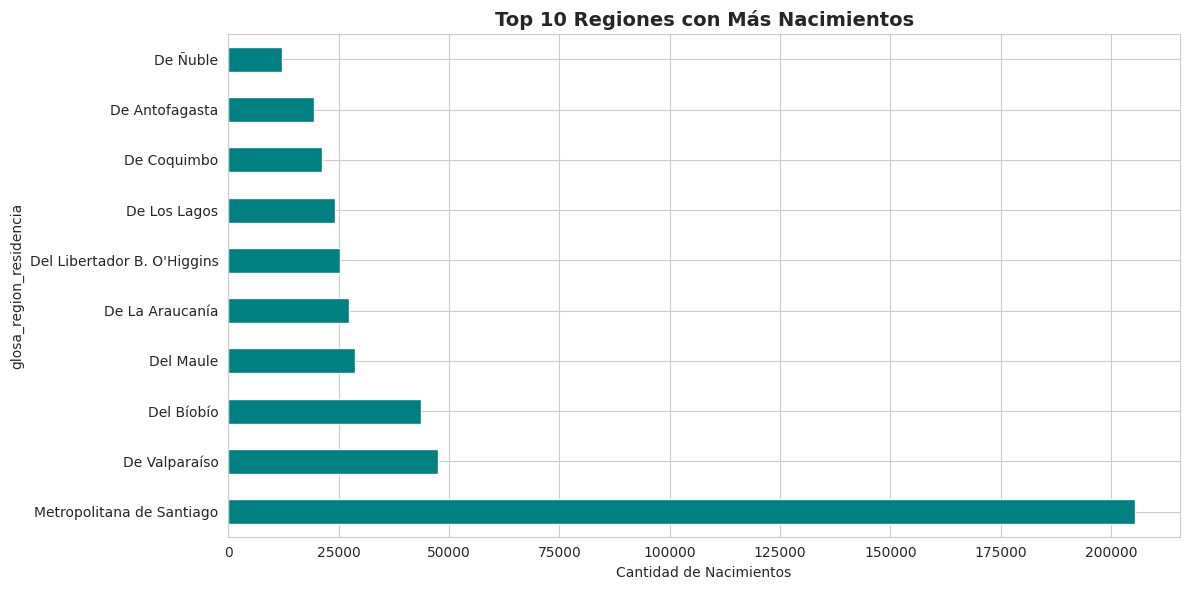


✅ REGIONES ÚNICAS EN DATASET
  - De Aisén del Gral. C. Ibáñez del Campo
  - De Antofagasta
  - De Arica y Parinacota
  - De Atacama
  - De Coquimbo
  - De La Araucanía
  - De Los Lagos
  - De Los Ríos
  - De Magallanes y de La Antártica Chilena
  - De Tarapacá
  - De Valparaíso
  - De Ñuble
  - Del Bíobío
  - Del Libertador B. O'Higgins
  - Del Maule
  - Metropolitana de Santiago


In [22]:
### 5.Analisis geografico
print("\n🗺️ DISTRIBUCIÓN POR REGIÓN")
print("=" * 60)
dist_region = df['glosa_region_residencia'].value_counts().head(10)
print(dist_region)

plt.figure(figsize=(12, 6))
dist_region.plot(kind='barh', color='teal')
plt.title('Top 10 Regiones con Más Nacimientos', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Nacimientos')
plt.tight_layout()
plt.show()

# Verificar nombres de regiones para mapeo con GeoJSON
print("\n✅ REGIONES ÚNICAS EN DATASET")
print("=" * 60)
regiones_unicas = df['glosa_region_residencia'].unique()
for region in sorted(regiones_unicas):
    print(f"  - {region}")


### 6.Analisis de grupos Etarios


👩 DISTRIBUCIÓN GRUPOS ETARIOS MADRE
grupo_etario_madre
15 A 19 AÑOS        60567
20 A 24 AÑOS       110843
25 A 29 AÑOS       124902
30 A 34 AÑOS       114041
35 A 39 AÑOS        68279
40 A 44 AÑOS        18573
45 A 49 AÑOS          955
50 O MAS AÑOS          17
MENORES 15 AÑO       1652
NO ESPECIFICADO       171
Name: count, dtype: int64


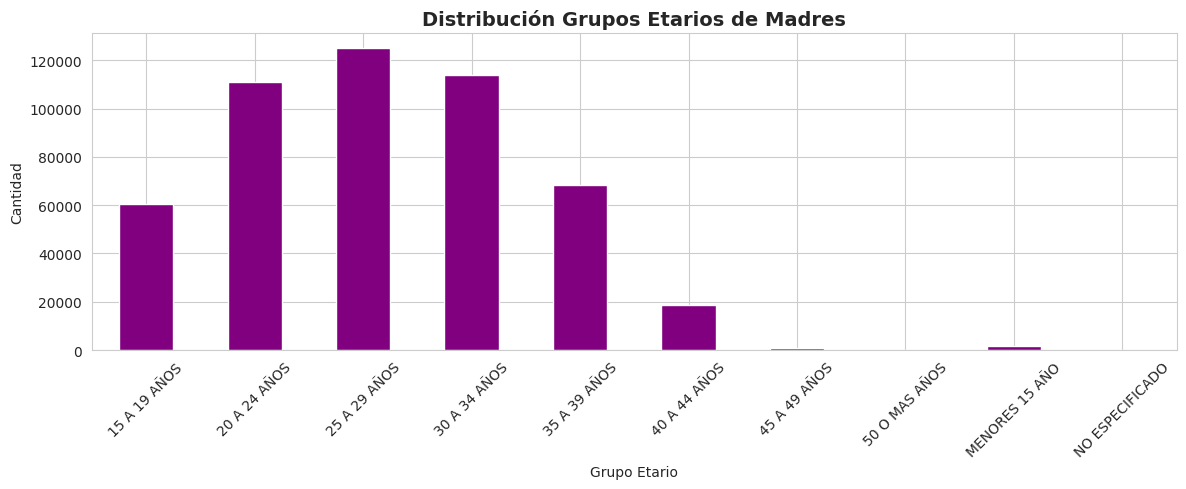

In [23]:
print("\n👩 DISTRIBUCIÓN GRUPOS ETARIOS MADRE")
print("=" * 60)
print(df['grupo_etario_madre'].value_counts().sort_index())

plt.figure(figsize=(12, 5))
df['grupo_etario_madre'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribución Grupos Etarios de Madres', fontsize=14, fontweight='bold')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Analisis de ausencia de datos Padre

### Cantidad de datos a analizar

In [24]:
# ============================================================
# SECCIÓN 7: ANÁLISIS ESPECIAL - AUSENCIA DE DATOS DEL PADRE
# ============================================================

print("\n" + "="*60)
print("🔍 ANÁLISIS ESPECIAL: AUSENCIA DE DATOS DEL PADRE")
print("="*60)
print("""
HIPÓTESIS: Los valores nulos en campos del padre NO son errores aleatorios,
sino que reflejan situaciones donde el padre está ausente (madre soltera,
padre no reconoce al hijo, desconocido, etc.)

Validaremos esta hipótesis mediante análisis de correlación y patrones.
""")

# Crear variable indicadora de ausencia de datos del padre
df['padre_ausente'] = df['nivel_padre'].isnull()

print(f"\n📊 ESTADÍSTICAS GENERALES")
print("="*60)
total_registros = len(df)
registros_sin_padre = df['padre_ausente'].sum()
pct_sin_padre = (registros_sin_padre / total_registros) * 100

print(f"Total registros analizados: {total_registros:,}")
print(f"Registros SIN datos del padre: {registros_sin_padre:,} ({pct_sin_padre:.2f}%)")
print(f"Registros CON datos del padre: {(total_registros - registros_sin_padre):,} ({(100-pct_sin_padre):.2f}%)")



🔍 ANÁLISIS ESPECIAL: AUSENCIA DE DATOS DEL PADRE

HIPÓTESIS: Los valores nulos en campos del padre NO son errores aleatorios,
sino que reflejan situaciones donde el padre está ausente (madre soltera,
padre no reconoce al hijo, desconocido, etc.)

Validaremos esta hipótesis mediante análisis de correlación y patrones.


📊 ESTADÍSTICAS GENERALES
Total registros analizados: 500,000
Registros SIN datos del padre: 50,587 (10.12%)
Registros CON datos del padre: 449,413 (89.88%)


### Correlación con Estado Civil de la Madre


👰 ANÁLISIS 1: RELACIÓN CON ESTADO CIVIL DE LA MADRE

📋 Tabla de Contingencia (conteo):
padre_ausente       False   True     All
estado_civil_desc                       
Casada             166018    293  166311
Divorciada             49     11      60
No especificado         3      8      11
Separada                1      0       1
Soltera            282614  50269  332883
Viuda                   2      0       2
All                448687  50581  499268

📊 Porcentaje de Ausencia de Datos del Padre por Estado Civil:
padre_ausente       False  True 
estado_civil_desc               
Casada              99.82   0.18
Divorciada          81.67  18.33
No especificado     27.27  72.73
Separada           100.00   0.00
Soltera             84.90  15.10
Viuda              100.00   0.00

🔬 Test Chi-cuadrado de Independencia:
   Chi-cuadrado: 27185.51
   P-valor: 0.0000000000000000000000000000000000000000
   Grados de libertad: 5
   ✅ CONCLUSIÓN: Existe relación estadísticamente significativa
      e

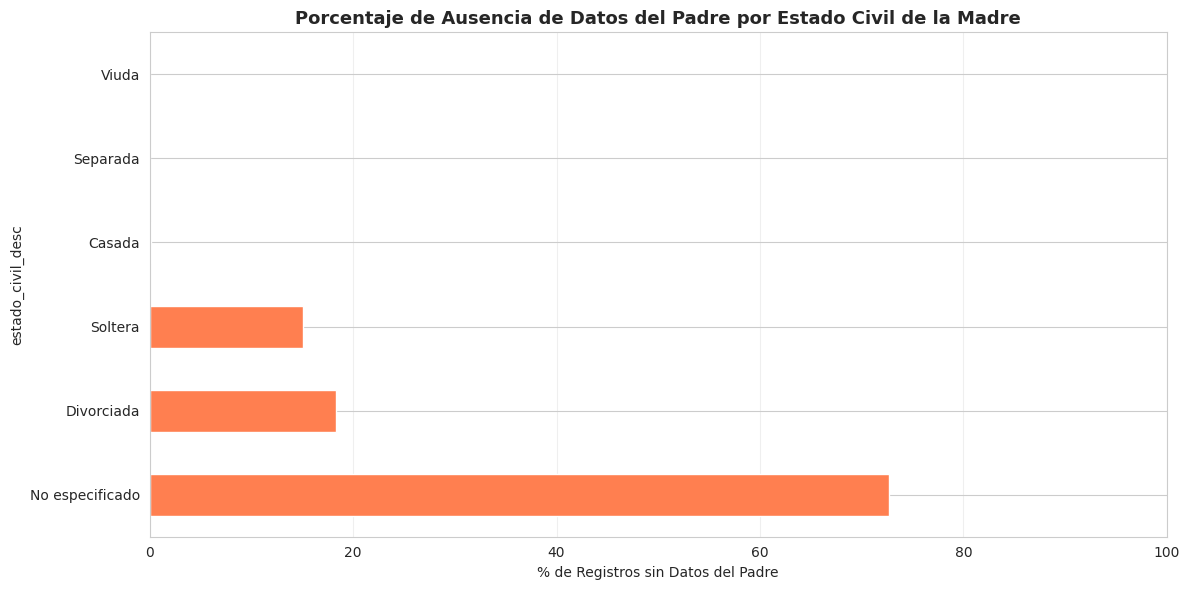

In [25]:
print("\n👰 ANÁLISIS 1: RELACIÓN CON ESTADO CIVIL DE LA MADRE")
print("="*60)
# Mapeo de códigos de estado civil (ajusta según tu codificación)
estado_civil_map = {
    1: 'Soltera',
    2: 'Casada',
    3: 'Viuda',
    4: 'Divorciada',
    5: 'Separada',
    9: 'No especificado'
}

df['estado_civil_desc'] = df['est_civ_madre'].map(estado_civil_map)

# Tabla de contingencia
tabla_contingencia = pd.crosstab(
    df['estado_civil_desc'],
    df['padre_ausente'],
    margins=True
)

# Porcentajes por fila
tabla_pct = pd.crosstab(
    df['estado_civil_desc'],
    df['padre_ausente'],
    normalize='index'
) * 100

print("\n📋 Tabla de Contingencia (conteo):")
print(tabla_contingencia)

print("\n📊 Porcentaje de Ausencia de Datos del Padre por Estado Civil:")
print(tabla_pct.round(2))

# Test Chi-cuadrado
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(
    pd.crosstab(df['estado_civil_desc'], df['padre_ausente'])
)
print(f"\n🔬 Test Chi-cuadrado de Independencia:")
print(f"   Chi-cuadrado: {chi2:.2f}")
print(f"   P-valor: {p_value:.40f}")
print(f"   Grados de libertad: {dof}")

if p_value < 0.05:
    print("   ✅ CONCLUSIÓN: Existe relación estadísticamente significativa")
    print("      entre el estado civil de la madre y la ausencia de datos del padre")
else:
    print("   ❌ No se encontró relación estadísticamente significativa")

# ========== CÁLCULO DEL ODDS RATIO ==========
print(f"\n📐 ODDS RATIO: Soltera vs Casada")
print("="*60)

# Filtrar solo Soltera y Casada para calcular OR
df_soltera_casada = df[df['estado_civil_desc'].isin(['Soltera', 'Casada'])].copy()
tabla_2x2 = pd.crosstab(df_soltera_casada['estado_civil_desc'], df_soltera_casada['padre_ausente'])

# Calcular Odds Ratio
soltera_sin = tabla_2x2.loc['Soltera', True]
soltera_con = tabla_2x2.loc['Soltera', False]
casada_sin = tabla_2x2.loc['Casada', True]
casada_con = tabla_2x2.loc['Casada', False]

odds_soltera = soltera_sin / soltera_con
odds_casada = casada_sin / casada_con
odds_ratio = odds_soltera / odds_casada

print(f"Odds de ausencia padre (Soltera): {odds_soltera:.2f}")
print(f"Odds de ausencia padre (Casada): {odds_casada:.2f}")
print(f"\n🎯 ODDS RATIO: {odds_ratio:.2f}")
print(f"\n✅ INTERPRETACIÓN:")
print(f"   Una madre SOLTERA tiene {odds_ratio:.1f} veces MÁS probabilidad")
print(f"   de NO tener datos del padre que una madre CASADA.")

if odds_ratio > 9:
    print(f"\n   🔥 ¡Esto confirma una asociación EXTREMADAMENTE FUERTE!")
elif odds_ratio > 3:
    print(f"\n   ✅ ¡Esto confirma una asociación MUY FUERTE!")
elif odds_ratio > 2:
    print(f"\n   ✅ Asociación moderada-fuerte")
else:
    print(f"\n   ⚪ Asociación débil")
# ============================================

# Visualización
plt.figure(figsize=(12, 6))
tabla_pct[True].sort_values(ascending=False).plot(kind='barh', color='coral')
plt.title('Porcentaje de Ausencia de Datos del Padre por Estado Civil de la Madre',
          fontsize=13, fontweight='bold')
plt.xlabel('% de Registros sin Datos del Padre')
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


### Evolución Temporal


📅 ANÁLISIS 2: EVOLUCIÓN TEMPORAL (2001-2022)

📊 Estadísticas por Año:
         Total  Sin_Padre  Pct_Sin_Padre
ano_nac                                 
2001     24319       2847          11.71
2002     23594       2659          11.27
2003     23182       2740          11.82
2004     22818       2629          11.52
2005     22970       2612          11.37
2006     22635       2569          11.35
2007     23892       2763          11.56
2008     24205       2728          11.27
2009     25138       2806          11.16
2010     24694       2777          11.25
2011     24283       2545          10.48
2012     23824       2469          10.36
2013     23574       2403          10.19
2014     24561       2349           9.56
2015     24016       2233           9.30
2016     22623       2089           9.23
2017     21556       1912           8.87
2018     22013       1842           8.37
2019     20803       1714           8.24
2020     18858       1434           7.60
2021     17656       1226  

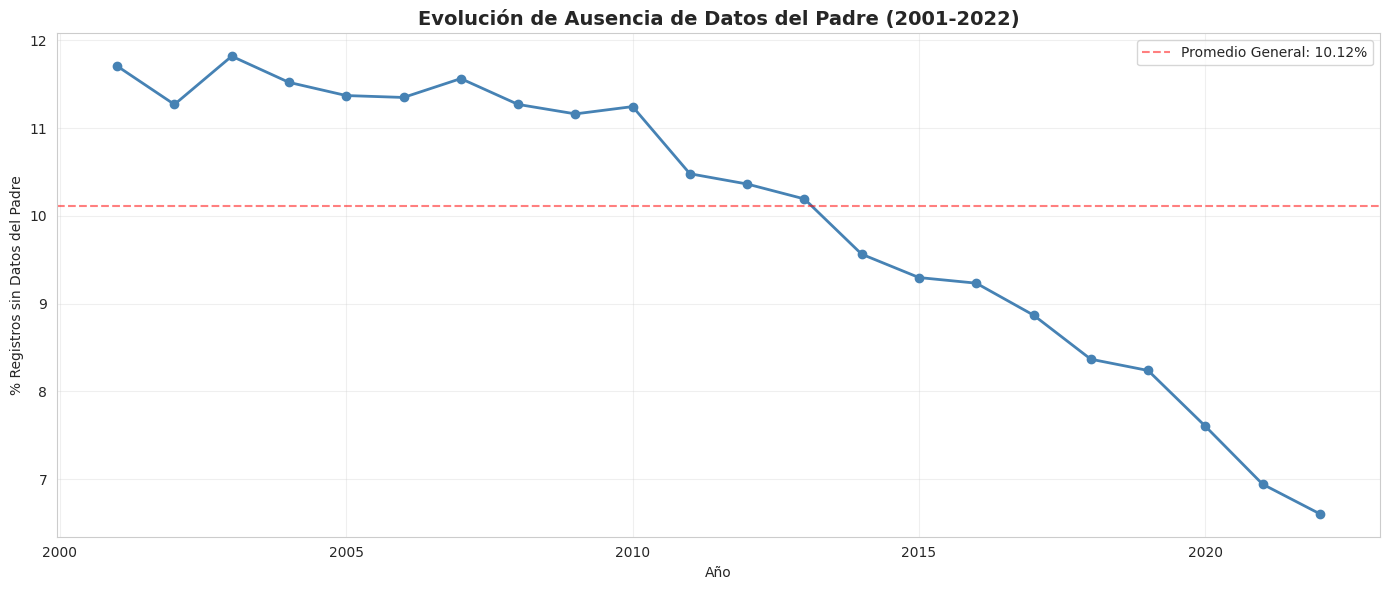

In [26]:
print("\n📅 ANÁLISIS 2: EVOLUCIÓN TEMPORAL (2001-2022)")
print("="*60)

# Calcular porcentaje de ausencia por año
ausencia_por_ano = df.groupby('ano_nac')['padre_ausente'].agg([
    ('Total', 'count'),
    ('Sin_Padre', 'sum'),
    ('Pct_Sin_Padre', lambda x: (x.sum() / len(x)) * 100)
])

print("\n📊 Estadísticas por Año:")
print(ausencia_por_ano.round(2))

# Identificar tendencia
primer_ano = ausencia_por_ano['Pct_Sin_Padre'].iloc[0]
ultimo_ano = ausencia_por_ano['Pct_Sin_Padre'].iloc[-1]
cambio = ultimo_ano - primer_ano

print(f"\n📈 TENDENCIA:")
print(f"   Año {ausencia_por_ano.index[0]}: {primer_ano:.2f}%")
print(f"   Año {ausencia_por_ano.index[-1]}: {ultimo_ano:.2f}%")
print(f"   Cambio: {cambio:+.2f} puntos porcentuales")

if cambio > 0:
    print(f"   ⬆️ La ausencia de datos del padre ha AUMENTADO")
elif cambio < 0:
    print(f"   ⬇️ La ausencia de datos del padre ha DISMINUIDO")
else:
    print(f"   ➡️ La ausencia de datos del padre se ha mantenido estable")

# Visualización
plt.figure(figsize=(14, 6))
plt.plot(ausencia_por_ano.index, ausencia_por_ano['Pct_Sin_Padre'],
         marker='o', linewidth=2, markersize=6, color='steelblue')
plt.title('Evolución de Ausencia de Datos del Padre (2001-2022)',
          fontsize=14, fontweight='bold')
plt.ylabel('% Registros sin Datos del Padre')
plt.xlabel('Año')
plt.grid(alpha=0.3)
plt.axhline(y=pct_sin_padre, color='red', linestyle='--', alpha=0.5,
            label=f'Promedio General: {pct_sin_padre:.2f}%')
plt.legend()
plt.tight_layout()
plt.show()


### Análisis Geográfico


🗺️ ANÁLISIS 3: DISTRIBUCIÓN GEOGRÁFICA POR REGIÓN

📊 Porcentaje de Ausencia por Región:
                                          Total  Sin_Padre  Pct_Sin_Padre
glosa_region_residencia                                                  
De Arica y Parinacota                      7008       1008          14.38
De Tarapacá                               11112       1555          13.99
De Los Ríos                               10343       1320          12.76
De Aisén del Gral. C. Ibáñez del Campo     3237        410          12.67
De La Araucanía                           27397       3438          12.55
De Atacama                                 9251       1151          12.44
De Antofagasta                            19342       2142          11.07
De Coquimbo                               21328       2341          10.98
De Valparaíso                             47520       4987          10.49
De Ñuble                                  12204       1267          10.38
Del Maule              

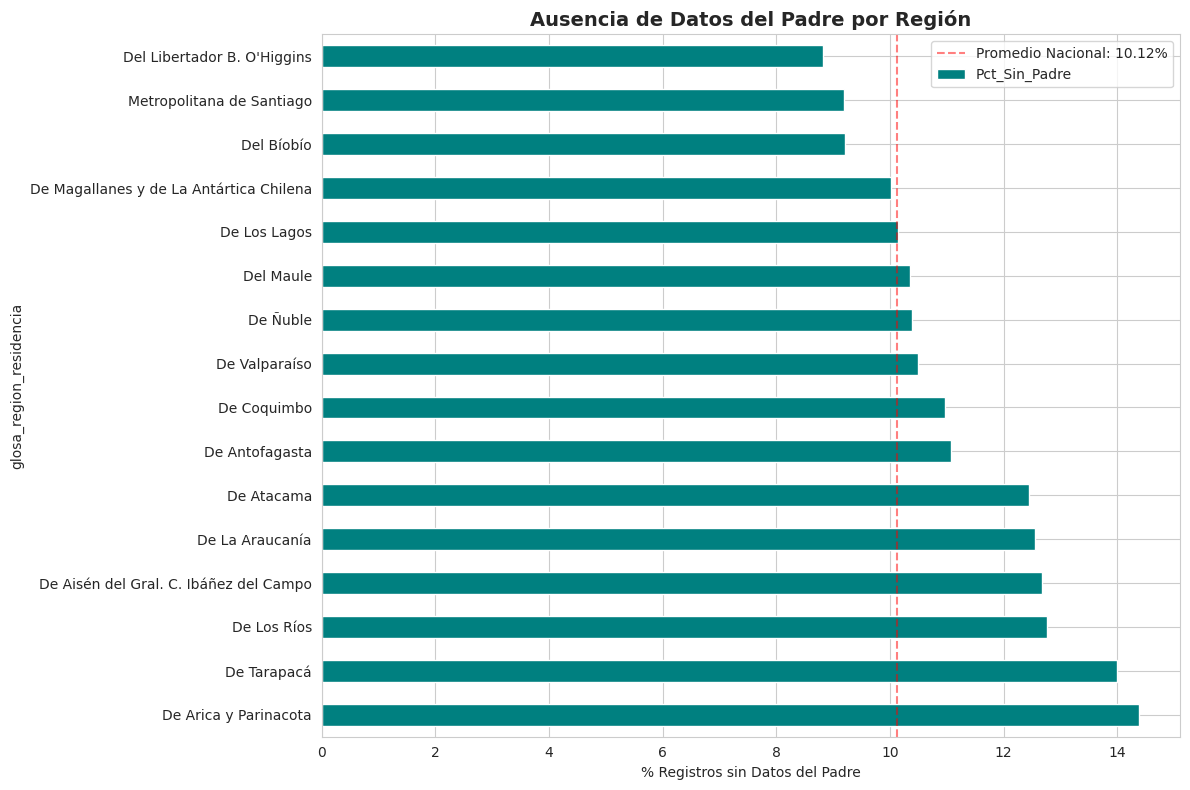

In [27]:
print("\n🗺️ ANÁLISIS 3: DISTRIBUCIÓN GEOGRÁFICA POR REGIÓN")
print("="*60)

# Calcular porcentaje por región
ausencia_por_region = df.groupby('glosa_region_residencia')['padre_ausente'].agg([
    ('Total', 'count'),
    ('Sin_Padre', 'sum'),
    ('Pct_Sin_Padre', lambda x: (x.sum() / len(x)) * 100)
]).sort_values('Pct_Sin_Padre', ascending=False)

print("\n📊 Porcentaje de Ausencia por Región:")
print(ausencia_por_region.round(2))

print(f"\n🏆 TOP 5 REGIONES CON MAYOR AUSENCIA:")
for i, (region, row) in enumerate(ausencia_por_region.head(5).iterrows(), 1):
    print(f"   {i}. {region}: {row['Pct_Sin_Padre']:.2f}%")

print(f"\n🏅 TOP 5 REGIONES CON MENOR AUSENCIA:")
for i, (region, row) in enumerate(ausencia_por_region.tail(5).iterrows(), 1):
    print(f"   {i}. {region}: {row['Pct_Sin_Padre']:.2f}%")

# Visualización
plt.figure(figsize=(12, 8))
ausencia_por_region['Pct_Sin_Padre'].plot(kind='barh', color='teal')
plt.title('Ausencia de Datos del Padre por Región', fontsize=14, fontweight='bold')
plt.xlabel('% Registros sin Datos del Padre')
plt.axvline(x=pct_sin_padre, color='red', linestyle='--', alpha=0.5,
            label=f'Promedio Nacional: {pct_sin_padre:.2f}%')
plt.legend()
plt.tight_layout()
plt.show()


### Perfil Sociodemográfico de las Madres


👩 ANÁLISIS 4: PERFIL SOCIODEMOGRÁFICO
Comparación de características entre madres CON y SIN datos del padre

📊 GRUPO ETARIO DE LA MADRE:
padre_ausente       False  True 
grupo_etario_madre              
15 A 19 AÑOS        10.79  23.85
20 A 24 AÑOS        21.36  29.36
25 A 29 AÑOS        25.52  20.19
30 A 34 AÑOS        23.84  13.60
35 A 39 AÑOS        14.22   8.68
40 A 44 AÑOS         3.80   2.91
45 A 49 AÑOS         0.19   0.20
50 O MAS AÑOS        0.00   0.00
MENORES 15 AÑO       0.24   1.10
NO ESPECIFICADO      0.03   0.11

📚 NIVEL EDUCATIVO DE LA MADRE:
                  count  mean   std  min  25%  50%  75%  max
padre_ausente                                               
False          449405.0  1.93  0.91  1.0  1.0  2.0  2.0  9.0
True            50578.0  2.36  1.28  1.0  2.0  2.0  2.0  9.0

🏥 TIPO DE PARTO:
padre_ausente   False  True 
parto_desc                  
Cesárea          1.99   1.70
Espontáneo      97.95  96.93
Fórceps/Vacuum   0.05   0.03
Ignorado         0.01   1.3

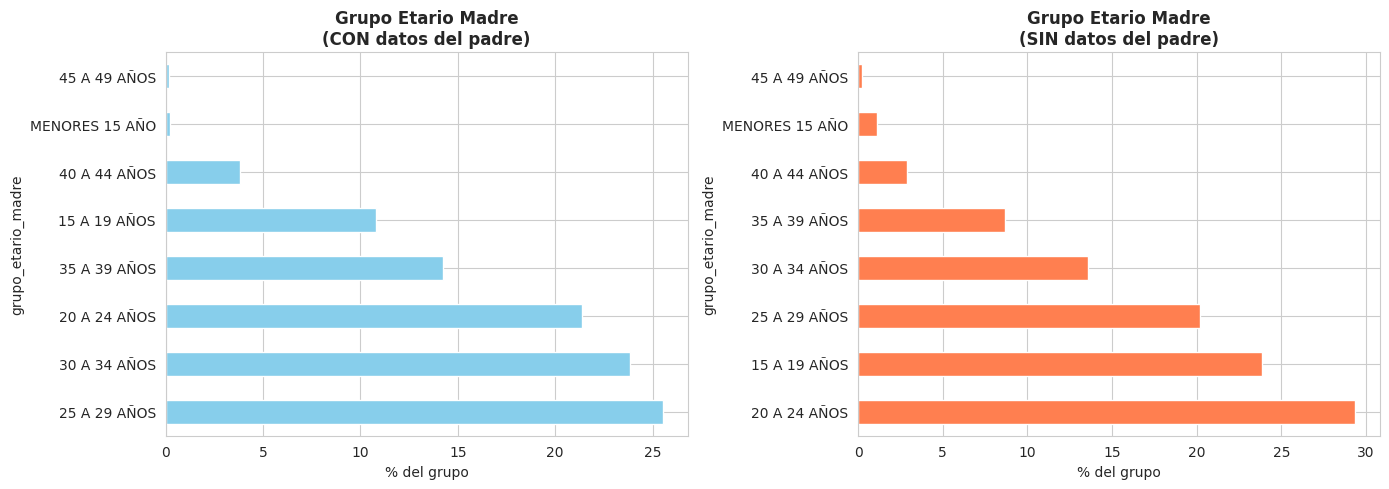

In [28]:
print("\n👩 ANÁLISIS 4: PERFIL SOCIODEMOGRÁFICO")
print("="*60)
print("Comparación de características entre madres CON y SIN datos del padre\n")

# Edad/Grupo Etario
print("📊 GRUPO ETARIO DE LA MADRE:")
grupo_etario_comparacion = pd.crosstab(
    df['grupo_etario_madre'],
    df['padre_ausente'],
    normalize='columns'
) * 100

print(grupo_etario_comparacion.round(2))

# Nivel educativo
print("\n📚 NIVEL EDUCATIVO DE LA MADRE:")
nivel_edu_stats = df.groupby('padre_ausente')['nivel_madre'].describe()
print(nivel_edu_stats.round(2))

# Tipo de parto
print("\n🏥 TIPO DE PARTO:")
df['parto_desc'] = df['tipo_parto'].map({1: 'Espontáneo', 2: 'Cesárea', 3: 'Fórceps/Vacuum', 9: 'Ignorado'})
tipo_parto_comparacion = pd.crosstab(
    df['parto_desc'],
    df['padre_ausente'],
    normalize='columns'
) * 100

print(tipo_parto_comparacion.round(2))

# Visualización comparativa - Grupo Etario
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Con datos del padre
grupo_etario_comparacion[False].sort_values(ascending=False).head(8).plot(
    kind='barh', ax=axes[0], color='skyblue'
)
axes[0].set_title('Grupo Etario Madre\n(CON datos del padre)', fontweight='bold')
axes[0].set_xlabel('% del grupo')

# Sin datos del padre
grupo_etario_comparacion[True].sort_values(ascending=False).head(8).plot(
    kind='barh', ax=axes[1], color='coral'
)
axes[1].set_title('Grupo Etario Madre\n(SIN datos del padre)', fontweight='bold')
axes[1].set_xlabel('% del grupo')

plt.tight_layout()
plt.show()


### Conclusiones del analisis

In [29]:
print("\n" + "="*60)
print("📝 CONCLUSIONES DEL ANÁLISIS DE AUSENCIA DATOS PADRE")
print("="*60)

# Calcular algunas métricas finales
estado_civil_mas_ausencia = tabla_pct[True].idxmax()
pct_mas_ausencia = tabla_pct[True].max()

region_mas_ausencia = ausencia_por_region['Pct_Sin_Padre'].idxmax()
pct_region_mas_ausencia = ausencia_por_region['Pct_Sin_Padre'].max()

print(f"""
1. ✅ VALIDACIÓN DE HIPÓTESIS:
   - Los valores nulos en campos del padre NO son errores aleatorios
   - Representan ausencia real del padre en el registro de nacimiento

2. 📊 HALLAZGOS CLAVE:
   - {pct_sin_padre:.2f}% de los nacimientos NO tienen datos del padre
   - Estado civil con mayor ausencia: {estado_civil_mas_ausencia} ({pct_mas_ausencia:.2f}%)
   - Región con mayor ausencia: {region_mas_ausencia} ({pct_region_mas_ausencia:.2f}%)

3. 📈 TENDENCIA TEMPORAL:
   - Cambio entre {ausencia_por_ano.index[0]} y {ausencia_por_ano.index[-1]}: {cambio:+.2f} puntos porcentuales

4. 💡 IMPLICACIONES PARA EL DASHBOARD:
   - Incluir KPI: "% Nacimientos sin datos del padre"
   - Crear visualización de tendencia temporal
   - Agregar análisis por región en mapa
   - Considerar filtro adicional para analizar este subgrupo

5. 🎯 VALOR SOCIOLÓGICO:
   - Este indicador refleja dinámicas familiares y sociales importantes
   - Puede correlacionarse con políticas públicas y apoyo social
   - Es un dato relevante para estudios de estructura familiar en Chile
""")



📝 CONCLUSIONES DEL ANÁLISIS DE AUSENCIA DATOS PADRE

1. ✅ VALIDACIÓN DE HIPÓTESIS:
   - Los valores nulos en campos del padre NO son errores aleatorios
   - Representan ausencia real del padre en el registro de nacimiento

2. 📊 HALLAZGOS CLAVE:
   - 10.12% de los nacimientos NO tienen datos del padre
   - Estado civil con mayor ausencia: No especificado (72.73%)
   - Región con mayor ausencia: De Arica y Parinacota (14.38%)

3. 📈 TENDENCIA TEMPORAL:
   - Cambio entre 2001 y 2022: -5.10 puntos porcentuales

4. 💡 IMPLICACIONES PARA EL DASHBOARD:
   - Incluir KPI: "% Nacimientos sin datos del padre"
   - Crear visualización de tendencia temporal
   - Agregar análisis por región en mapa
   - Considerar filtro adicional para analizar este subgrupo

5. 🎯 VALOR SOCIOLÓGICO:
   - Este indicador refleja dinámicas familiares y sociales importantes
   - Puede correlacionarse con políticas públicas y apoyo social
   - Es un dato relevante para estudios de estructura familiar en Chile



## Analisis Kpis

### 7.KPIs Clave Identificados

In [30]:
print("\n📌 KPIs CLAVE DEL PROYECTO")
print("=" * 60)

# Total de nacimientos
total_nacimientos = len(df)

# Total y porcentaje de cesáreas
total_cesareas = (df['tipo_parto'] == 2).sum()
pct_cesareas = (total_cesareas / total_nacimientos * 100)

# Edad promedio madre
edad_promedio_madre = df['grupo_etario_madre'].mode()[0] if not df['grupo_etario_madre'].isnull().all() else 'N/A'

# Región con más nacimientos
region_top = df['glosa_region_residencia'].value_counts().idxmax()

print(f"✅ Total Nacimientos (muestra): {total_nacimientos:,}")
print(f"✅ Total Cesáreas: {total_cesareas:,} ({pct_cesareas:.2f}%)")
print(f"✅ Grupo Etario Madre más frecuente: {edad_promedio_madre}")
print(f"✅ Región con más nacimientos: {region_top}")



📌 KPIs CLAVE DEL PROYECTO
✅ Total Nacimientos (muestra): 500,000
✅ Total Cesáreas: 9,808 (1.96%)
✅ Grupo Etario Madre más frecuente: 25 A 29 AÑOS
✅ Región con más nacimientos: Metropolitana de Santiago
